```
Name: Fatih Arslan Tugay

ID: 181101008

Course: BIL470
```

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from LR import LinearRegression

# Exploratory Data Analysis (EDA)

## Read and Edit Dataset

In [2]:
data = pd.read_csv("data.csv")
data = data.drop(columns="Gender") 
## Remove gender column because it doesnt change the BMI result

## Data View

In [3]:
display(data)

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


## Duplicates in Dataset

In [4]:
display(data[data.duplicated()]);
data.drop_duplicates(subset=None, inplace=True);
## Drop duplicates

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


## Feature Statistics of Dataset

In [5]:
print(data["Height"].describe())

count    476.000000
mean     169.878151
std       16.332011
min      140.000000
25%      156.000000
50%      170.000000
75%      184.000000
max      199.000000
Name: Height, dtype: float64


In [6]:
print(data["Weight"].describe())

count    476.000000
mean     106.920168
std       32.319945
min       50.000000
25%       80.000000
50%      107.000000
75%      137.000000
max      160.000000
Name: Weight, dtype: float64


In [7]:
print(data["Index"].describe())

count    476.000000
mean       3.779412
std        1.337585
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


## Index Distributions

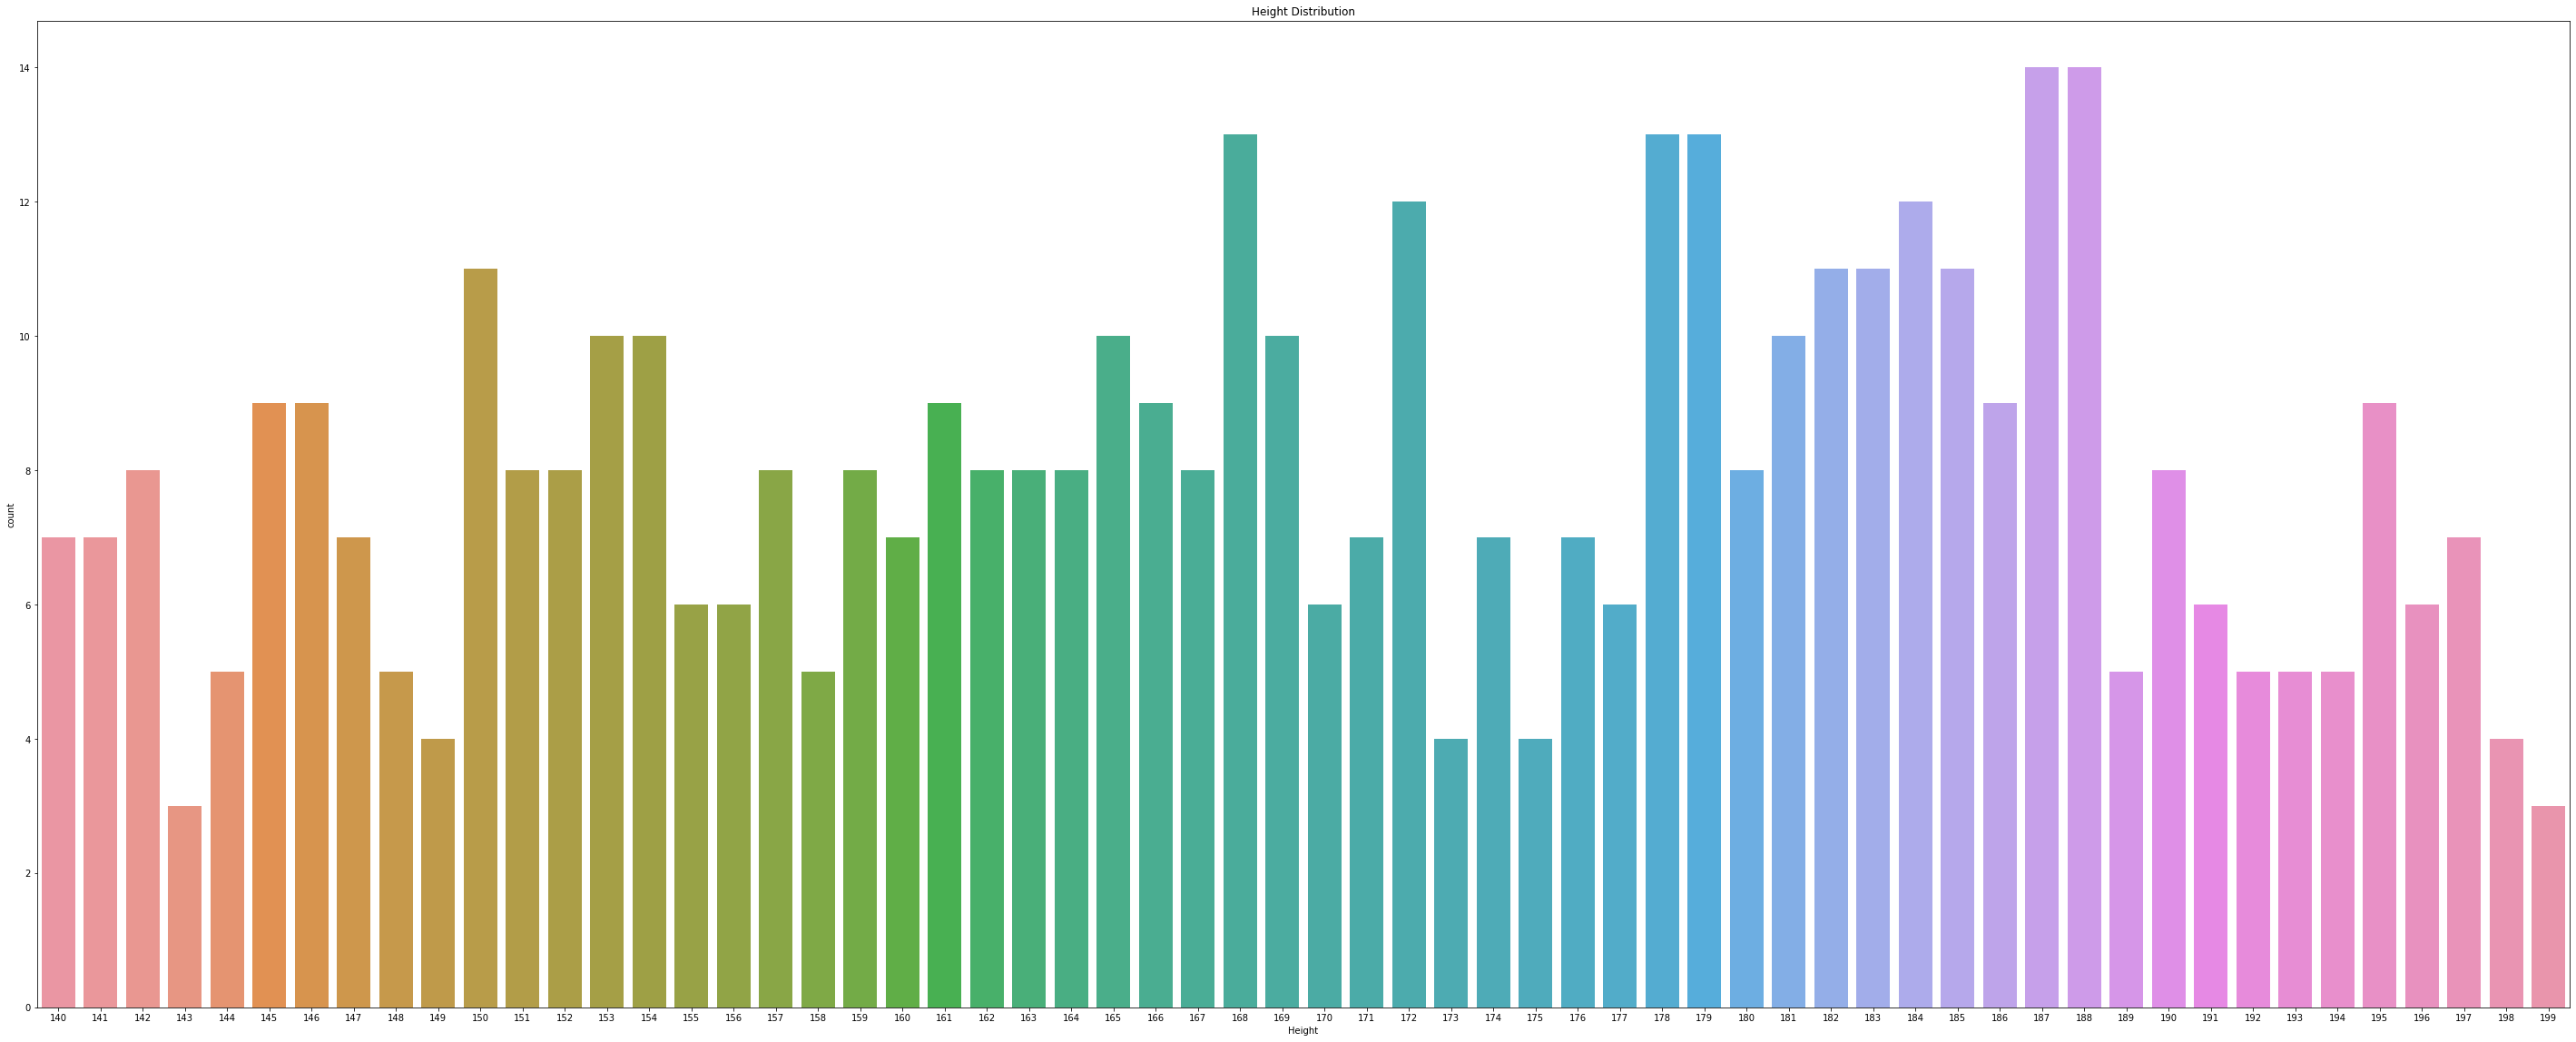

In [8]:
plt.figure(figsize=(50, 20));
plt.title("Height Distribution");
sns.countplot(x=data["Height"]);

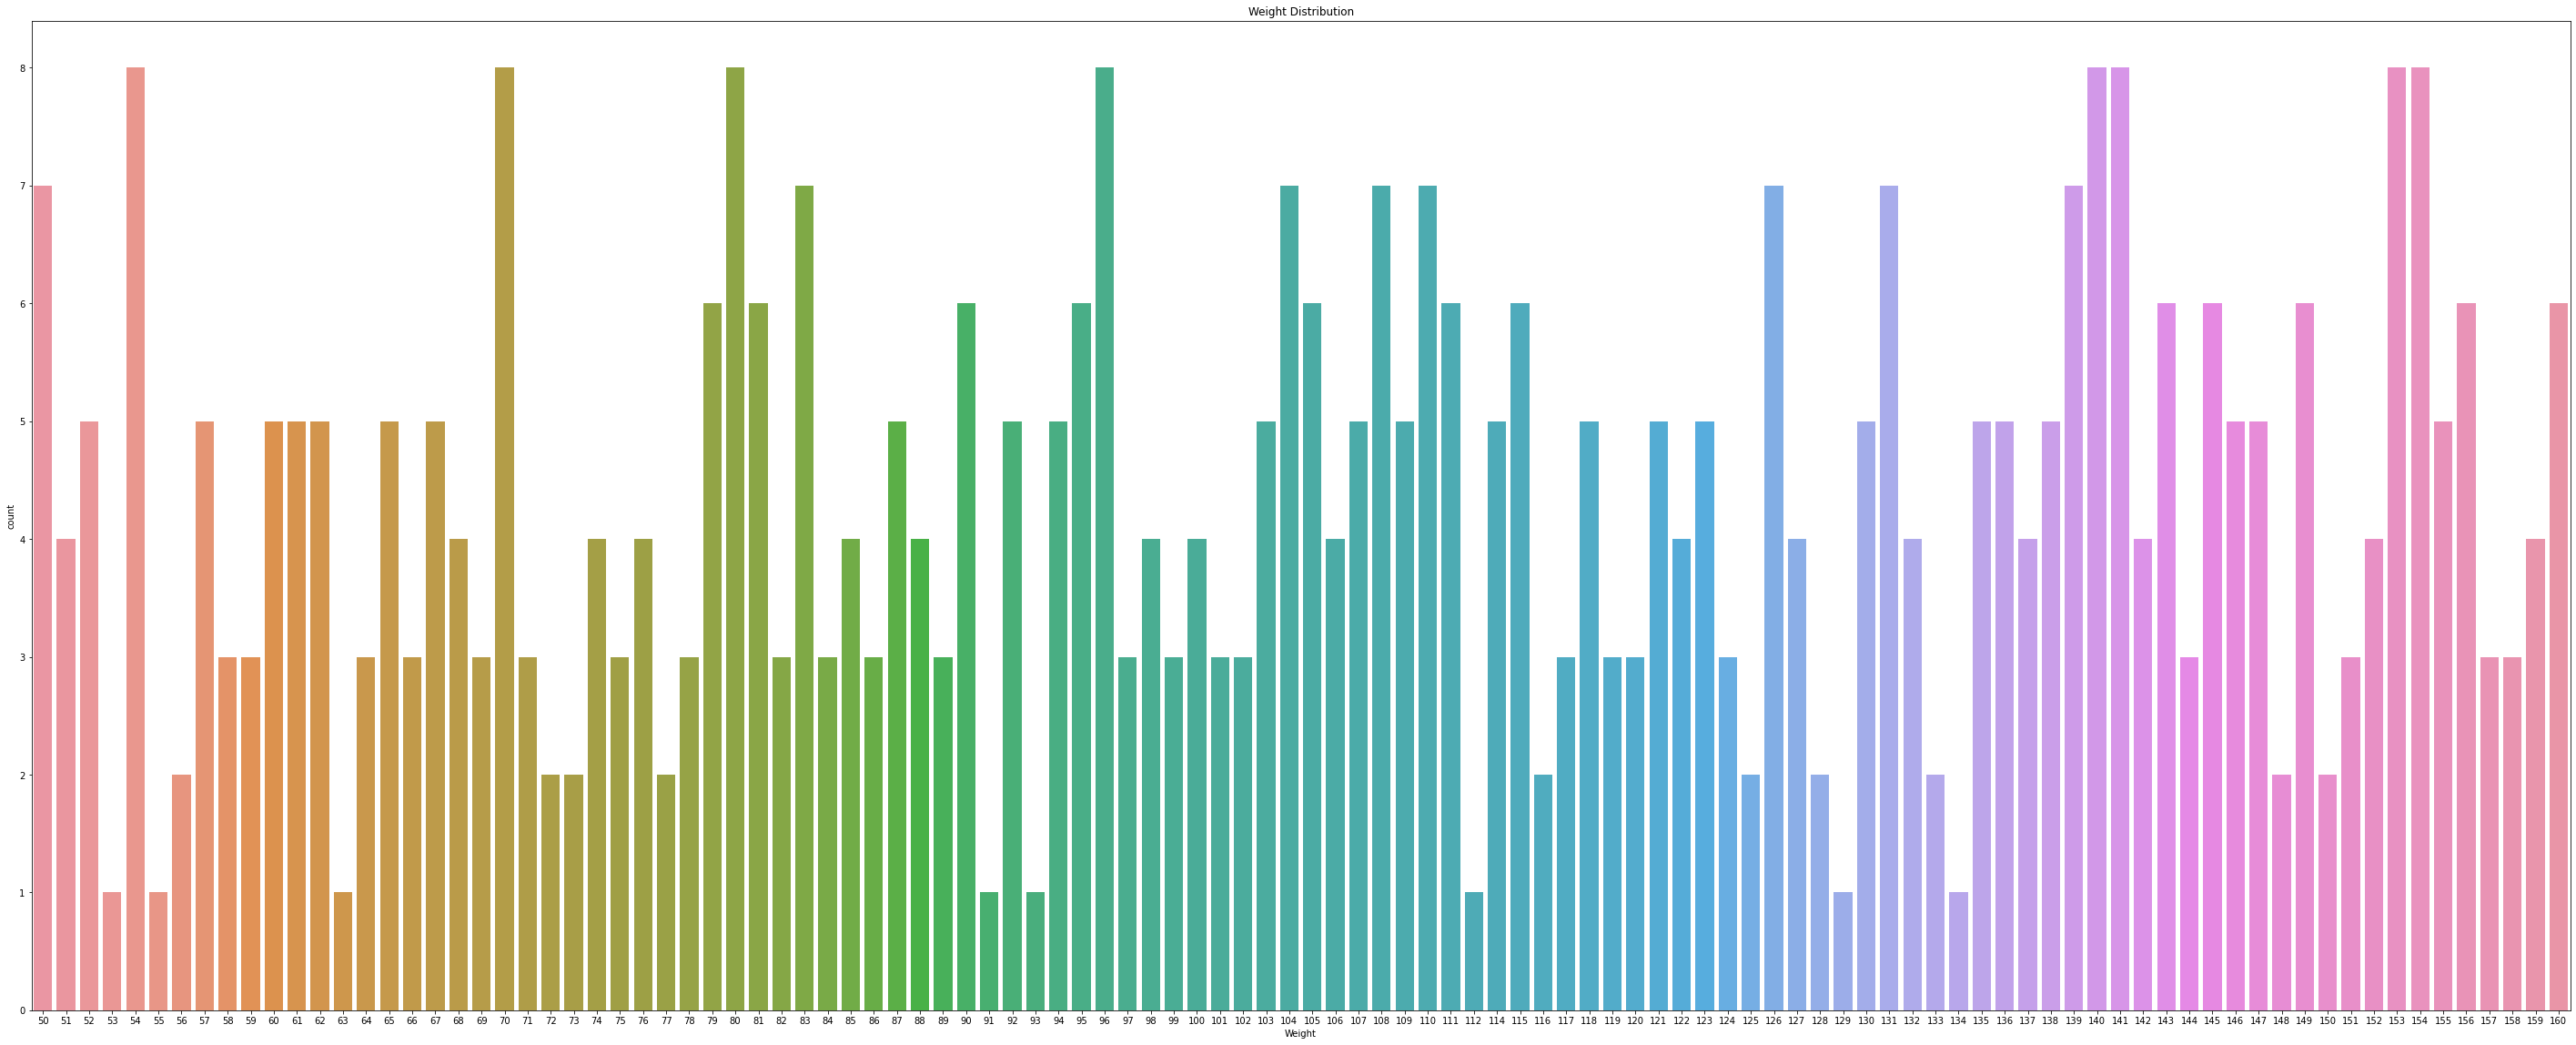

In [9]:
plt.figure(figsize=(50, 20));
plt.title("Weight Distribution");
sns.countplot(x=data["Weight"]);

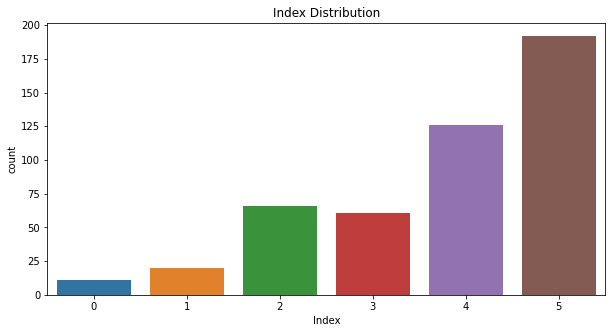

In [10]:
plt.figure(figsize=(10, 5));
plt.title("Index Distribution");
sns.countplot(x=data["Index"]);

## 2D Space Distribution

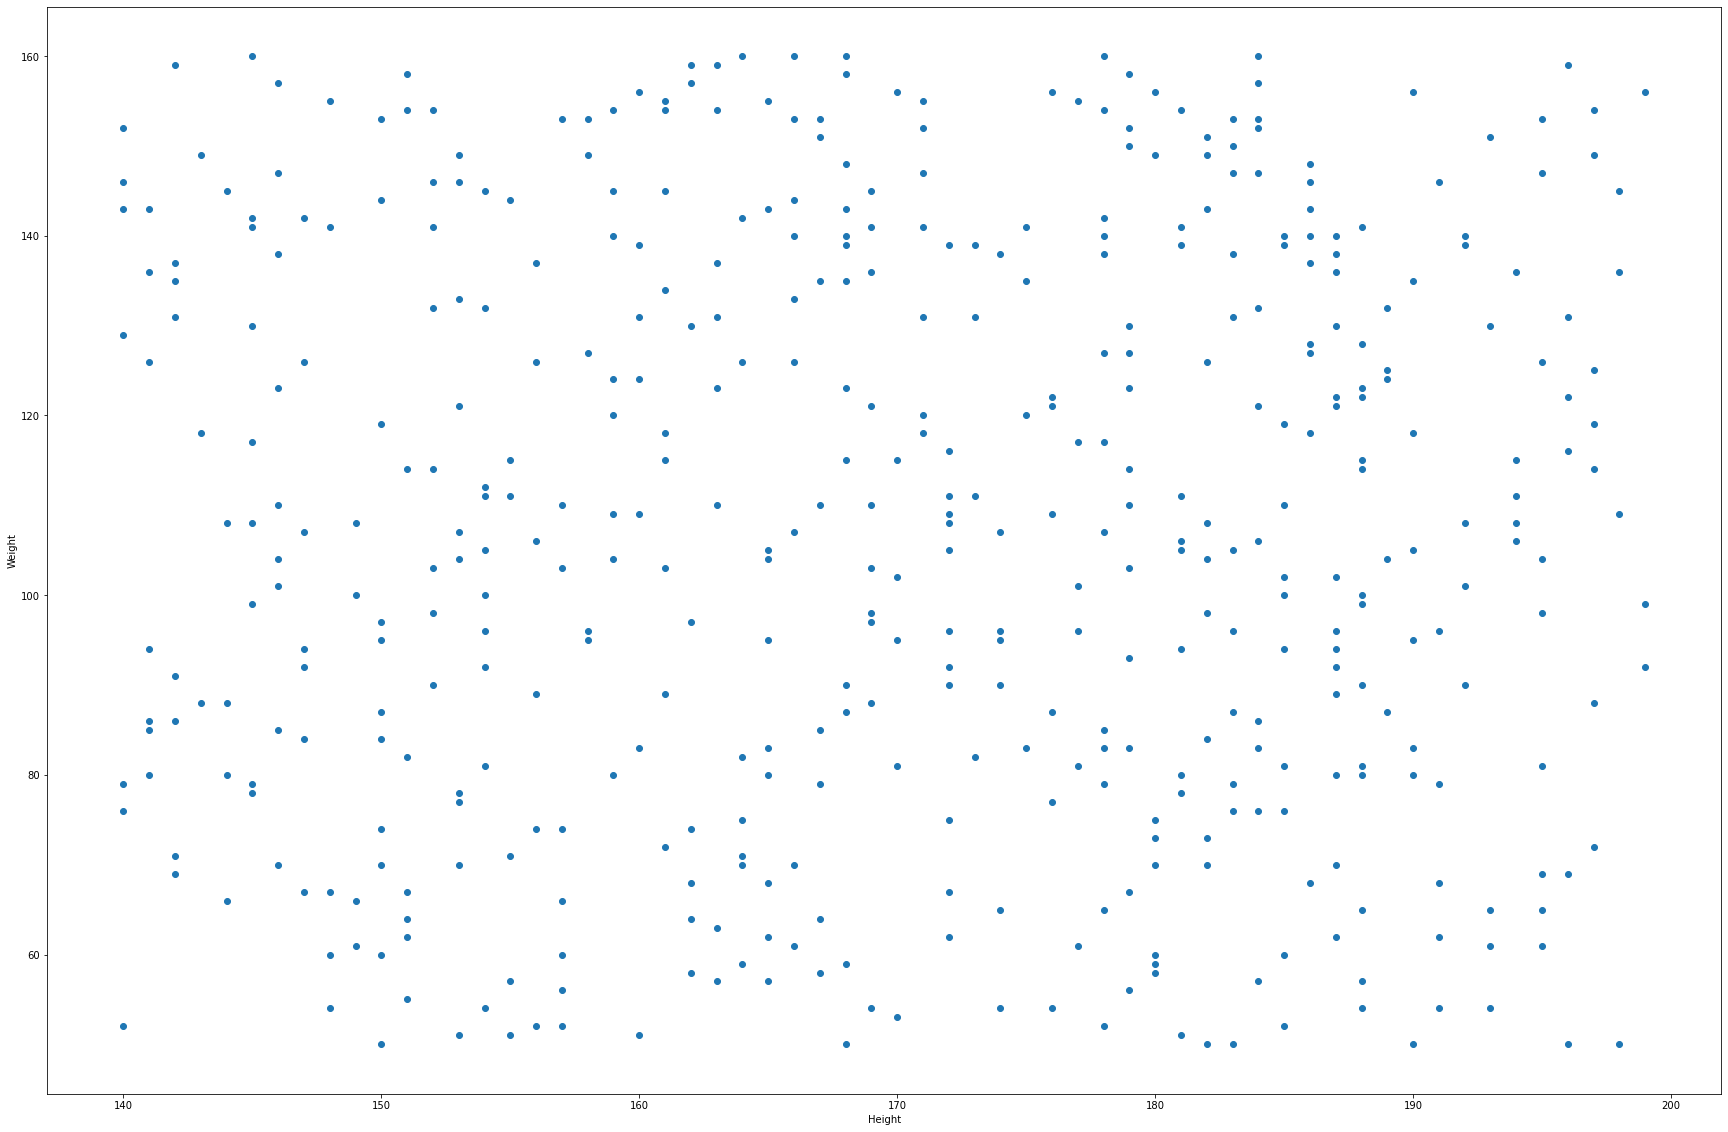

In [11]:
plt.figure(figsize=(30, 20));  
plt.plot(data["Height"].values.tolist(), data["Weight"].values.tolist(), "o")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

# Train and Test the LR

## Split Data to Test (%50) and Train (%50)

In [12]:
X = data["Height"].values.tolist();
Y = data["Weight"].values.tolist();
Z = data["Index"].values.tolist();
X = pd.Series(X);
Y = pd.Series(Y);
Z = pd.Series(Z);

X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z, test_size=0.5, shuffle=True)

X_train_list = X_train.values.tolist();
X_test_list = X_test.values.tolist();
Y_train_list = Y_train.values.tolist();
Y_test_list = Y_test.values.tolist();
Z_train_list = Z_train.values.tolist();
Z_test_list = Z_test.values.tolist();

## Train and Create Decider

In [13]:
lr = LinearRegression(learning_rate=0.000005, epoch=1000);
return_lists = lr.fit(X_train_list, Y_train_list, Z_train_list, X_test_list, Y_test_list, Z_test_list);

## Test Outputs

In [14]:
predictions = [round(num) for num in lr.predict(X_test_list, Y_test_list)]

print("Test Features Expected Results")
print(Z_test_list)
print("Prediction Results (Rounded)")
print(predictions)

Test Features Expected Results
[5, 3, 5, 5, 0, 4, 5, 3, 5, 2, 4, 5, 5, 4, 5, 5, 5, 5, 2, 5, 5, 4, 5, 5, 5, 4, 4, 2, 5, 2, 5, 5, 5, 4, 2, 4, 5, 5, 5, 4, 5, 5, 4, 1, 5, 4, 2, 4, 4, 0, 4, 4, 1, 3, 3, 4, 5, 1, 5, 3, 5, 3, 3, 5, 3, 0, 5, 3, 3, 2, 4, 5, 5, 3, 4, 3, 4, 2, 1, 5, 5, 2, 5, 4, 2, 4, 3, 2, 2, 5, 4, 5, 5, 3, 4, 2, 2, 5, 1, 2, 4, 3, 5, 5, 4, 3, 5, 4, 5, 5, 5, 3, 5, 3, 5, 5, 1, 3, 4, 3, 5, 2, 5, 1, 2, 5, 4, 2, 1, 4, 5, 5, 4, 4, 3, 5, 1, 2, 5, 0, 5, 3, 4, 3, 2, 1, 5, 4, 4, 5, 4, 4, 0, 4, 5, 3, 5, 2, 5, 5, 5, 5, 2, 3, 4, 2, 5, 5, 3, 4, 4, 4, 5, 3, 3, 2, 5, 3, 3, 5, 4, 5, 2, 5, 5, 5, 5, 5, 5, 5, 0, 4, 5, 4, 5, 5, 2, 3, 5, 3, 4, 4, 5, 4, 2, 4, 2, 4, 2, 5, 4, 4, 0, 5, 5, 3, 3, 4, 5, 5, 4, 3, 5, 5, 5, 4, 5, 5, 5, 4, 5, 2, 4, 4, 4, 4, 5, 3]
Prediction Results (Rounded)
[5, 4, 3, 5, 2, 4, 6, 2, 4, 2, 4, 5, 4, 4, 5, 5, 5, 5, 3, 5, 5, 3, 4, 3, 3, 5, 3, 2, 4, 3, 5, 5, 5, 3, 2, 3, 3, 6, 5, 4, 5, 3, 4, 2, 5, 4, 3, 5, 4, 2, 3, 4, 2, 3, 4, 4, 6, 2, 5, 3, 4, 4, 3, 5, 3, 2, 4, 3, 2, 2, 4, 5, 6, 3, 5,

# Results

## Train Loss and Accuracy

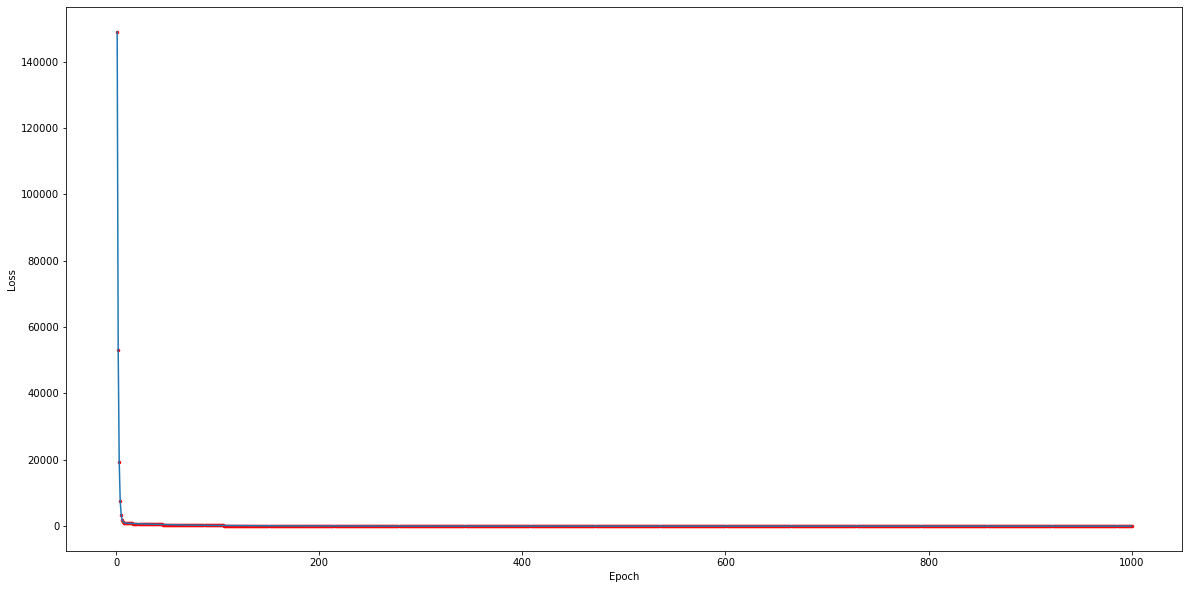

Loss Values in Train for some epoch values (to show how it decreased):
[148921.38655462186, 856.3796789047752, 721.5735768806182, 611.1246729718696, 517.595587643683, 438.3942578797422, 371.32580943195705, 314.53160166417257, 266.43771979589536, 225.7113576417485, 191.22388209542243, 162.01955577916627, 137.28905108233286, 116.34702159428086, 98.61310937787917, 83.59586174590004, 70.87911183246621, 60.11044552986074, 50.99143517961089, 43.269369368093905, 36.730249637854854, 31.19286003534167, 26.50374514684562, 22.532957450998204, 19.170456135932874, 16.323057582995613, 13.911853006998616, 11.870021689131653, 10.14097920154297, 8.676809306090943, 7.436936071113615, 6.386999407127915, 5.497902859636651, 4.745007270912247, 4.107447965034014, 3.5675565336055177, 3.1103711983345836, 2.7232221813532074, 2.395380592813534, 2.1177611055246346, 1.8826701769730838, 1.6835928413065813, 1.5150121627335131, 1.3722563469238933, 1.2513692734721098, 1.1490008615402205, 1.0623142304294342, 0.98890708

In [15]:
epoch = np.arange(1, 1001);

plt.figure(figsize=(20, 10));
plt.plot(epoch, lr.lossTrain);
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.scatter(epoch, lr.lossTrain, label="dot", color="red", marker=".", s=25);
plt.show();
print("Loss Values in Train for some epoch values (to show how it decreased):")
print(lr.lossTrain[0:1000:10])

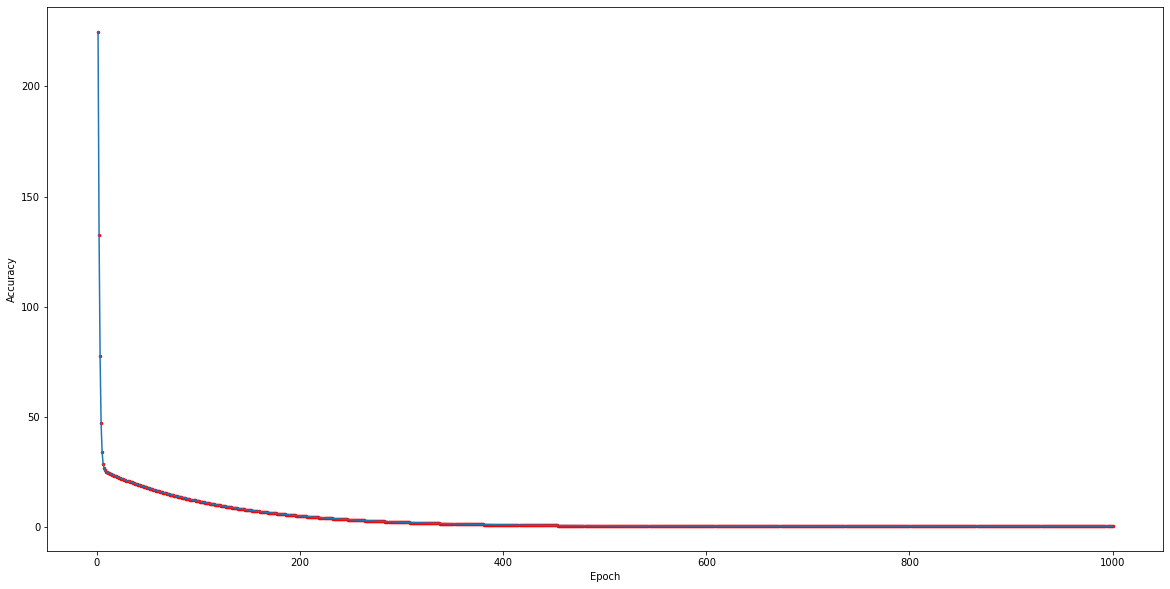

Accucary Values in Train for some epoch values (to show how it decreased):
[224.742786212485, 24.765654687245174, 22.740966421555928, 20.93409735668651, 19.271644210059268, 17.741818716701307, 16.334038733502176, 15.038567778521486, 13.846446128939244, 12.749428845410133, 11.739928748450533, 10.810963944063834, 9.956109535635184, 9.169549188740364, 8.446515368196295, 7.781410548432042, 7.171444982003777, 6.610561493320258, 6.094423827373804, 5.6194622785627155, 5.1823919231331415, 4.780189900022412, 4.410794320371983, 4.070976751662577, 3.7582689400487337, 3.4705081394718293, 3.2057041421404535, 2.9635124356923126, 2.741505836483478, 2.538121444348589, 2.3520712330578126, 2.1812601723277147, 2.025142590052083, 1.8825408840484472, 1.7514617567779782, 1.630899103202933, 1.5206875275144451, 1.4213265131648634, 1.3302224255428483, 1.2464087041787733, 1.1701748479970664, 1.1020632831878465, 1.0406250498470617, 0.9851814771774526, 0.9371128752354496, 0.8943288175952236, 0.855990849693299, 0.

In [16]:
plt.figure(figsize=(20, 10));
plt.plot(epoch, lr.accTrain);
plt.xlabel("Epoch");
plt.ylabel("Accuracy");
plt.scatter(epoch, lr.accTrain, label="dot", color="red", marker=".", s=25);
plt.show();
print("Accucary Values in Train for some epoch values (to show how it decreased):")
print(lr.accTrain[0:1000:10])

## Test Loss and Accuracy

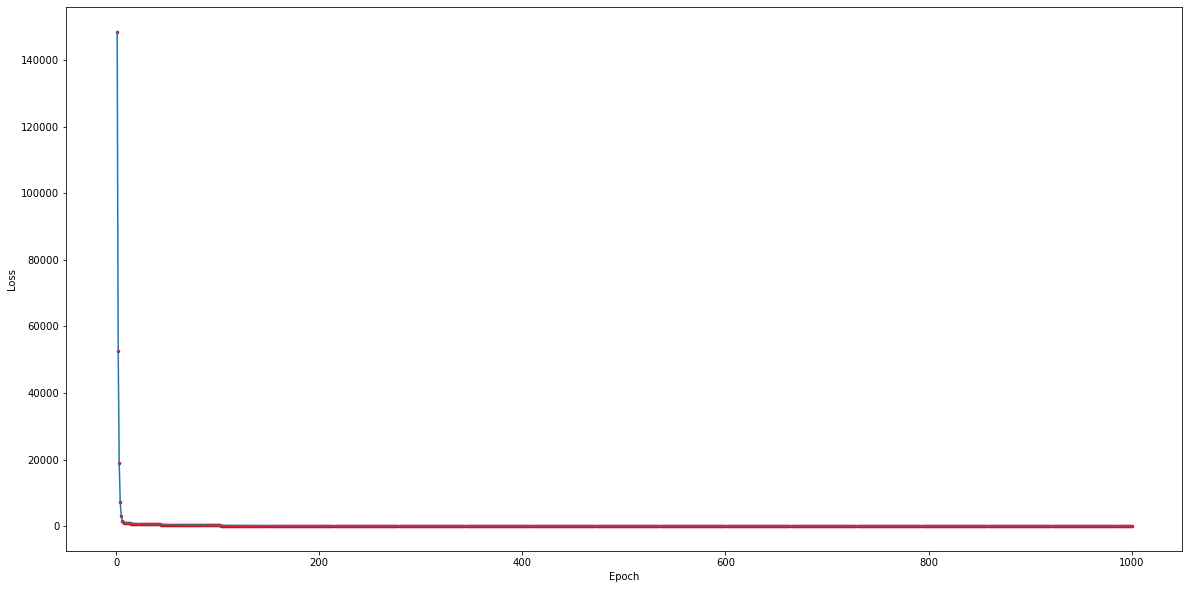

Loss Values in Test for some epoch values (to show how it decreased):
[148462.34033613445, 817.875015171822, 695.1351817013168, 588.4910120556483, 498.174549986848, 421.7147886178465, 356.9874805779387, 302.1937677196661, 255.81048330314687, 216.54790959514142, 183.31400659552642, 155.18412130350055, 131.37533790338654, 111.22475787232757, 94.17110793442687, 79.7391660219721, 67.52657351048539, 57.19266813504564, 48.44902800364867, 41.05146455151718, 34.793242442649756, 29.499338434587028, 25.02158002190843, 21.234529061525485, 18.031996234288815, 15.324089685126742, 13.034715992547778, 11.099464158294433, 9.46381392677131, 8.081618735899326, 6.91382121548407, 5.927365597076307, 5.094276859353335, 4.390881056598351, 3.7971451930491993, 3.2961183212484158, 2.873458349945271, 2.5170314243958654, 2.216572754973246, 1.9633994746367442, 1.7501675492706146, 1.5706659871991075, 1.4196426292021564, 1.2926566767849241, 1.1859538585925167, 1.0963607632827201, 1.0211953992970997, 0.95819149255774

In [17]:
plt.figure(figsize=(20, 10));
plt.plot(epoch, lr.lossTest);
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.scatter(epoch, lr.lossTest, label="dot", color="red", marker=".", s=25);
plt.show();
print("Loss Values in Test for some epoch values (to show how it decreased):")
print(lr.lossTest[0:1000:10])

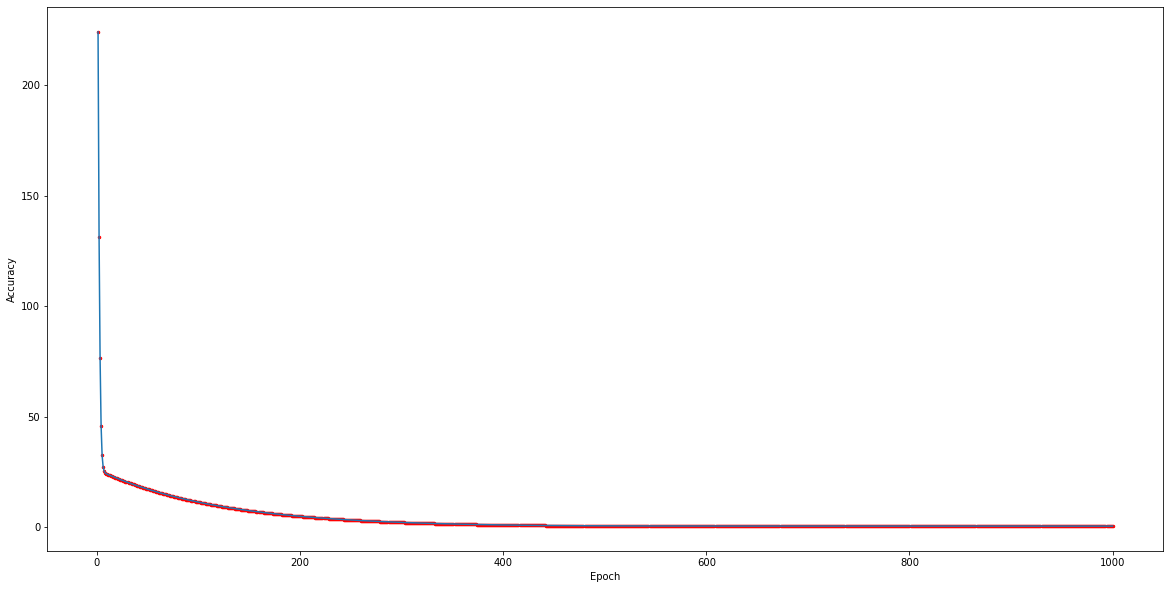

Accucary Values in Test for some epoch values (to show how it decreased):
[223.98826678871544, 23.871596443358403, 22.010516342713405, 20.26004995874366, 18.64892381421716, 17.167463665501057, 15.804190549484353, 14.54967582195244, 13.395243021007872, 12.333030096522583, 11.356435475758163, 10.457751036391661, 9.630761306364391, 8.869746667846426, 8.170343617930047, 7.5274403555362435, 6.936054612384959, 6.392125302649777, 5.893030560147596, 5.43422136191772, 5.0123871671840465, 4.6242977194420165, 4.267169036045684, 3.9392869984445875, 3.6387090708666316, 3.3621104644923303, 3.1075781713135684, 2.873919080439249, 2.6590635233421525, 2.461990585176637, 2.2813670950364133, 2.1153108444037256, 1.9625258422156644, 1.822843266999219, 1.695489536079902, 1.5784488310135758, 1.4708726742266207, 1.3726864202194182, 1.282873604590707, 1.2023034565684816, 1.1288207745011305, 1.0612853015117503, 1.0008870333607793, 0.9464384725384325, 0.8978159843976312, 0.8572690561735767, 0.8231580131259212, 0.

In [18]:
plt.figure(figsize=(20, 10));
plt.plot(epoch, lr.accTest);
plt.xlabel("Epoch");
plt.ylabel("Accuracy");
plt.scatter(epoch, lr.accTest, label="dot", color="red", marker=".", s=25);
plt.show();
print("Accucary Values in Test for some epoch values (to show how it decreased):")
print(lr.accTest[0:1000:10])

## Mean Absolute Error

In [19]:
print("The Mean Absolute Error of train data: ")
print(lr.accTrain[len(lr.accTrain) - 1])

print("The Mean Absolute Error of test data: ")
print(lr.accTest[len(lr.accTest) - 1])
## Last value (when epoch is 1000, last cycle of for) of acc array is the MAE of data

The Mean Absolute Error of train data: 
0.6165616497419275
The Mean Absolute Error of test data: 
0.6273902330803182


## Linear Equation

In [20]:
print("Last values of linear equation is:")
print("m1: ", lr.m1);
print("m2: ", lr.m2);
print("b: ", lr.b);
print()
print("In this case, the equation is expressed as:")
print("BMI = ", lr.m1, "*Height + ", lr.m2, "*Weight + ", lr.b)

Last values of linear equation is:
m1:  -0.0016715765930818427
m2:  0.0376471732269009
b:  -0.00639788347066678

In this case, the equation is expressed as:
BMI =  -0.0016715765930818427 *Height +  0.0376471732269009 *Weight +  -0.00639788347066678


## Conclusions

Since we chose the m1, m2 and b values randomly (1, 2 and 0) at the beginning, the loss and accuracy values were also at high levels. As we trained the model, these values were reduced to certain ranges. Because for each epoch value, changes were made on m1, m2 and b values and loss and accuracy values were recalculated. When the model was tested, the accuracy value was ~0.62. As can be seen above, mean absolute error method was used in the calculation of accuracy.
